<a href="https://colab.research.google.com/github/ShwetaAKS/CODSOFT/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Task No: 4

#Problem Statement : In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine
#learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential.

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#Step 1:Read the dataset
import pandas as pd
df = pd.read_csv('/content/advertising.csv')

In [4]:
#Step 2:Perform basic data quality checks
df.info() #Check the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isna().sum() #Check missing values in the dataset

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum() #Check duplicates in the dataset

0

In [7]:
#Step 3 :Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

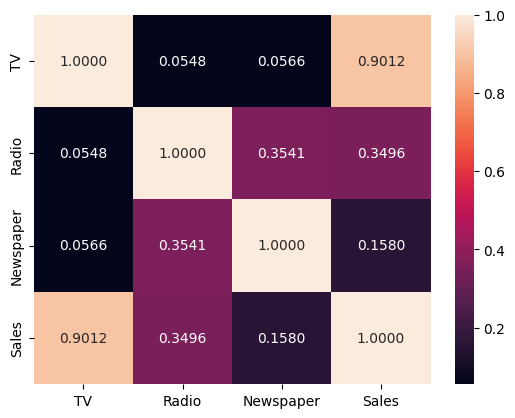

In [8]:
sns.heatmap(df.corr(),annot = True,fmt='.4f')
plt.show()

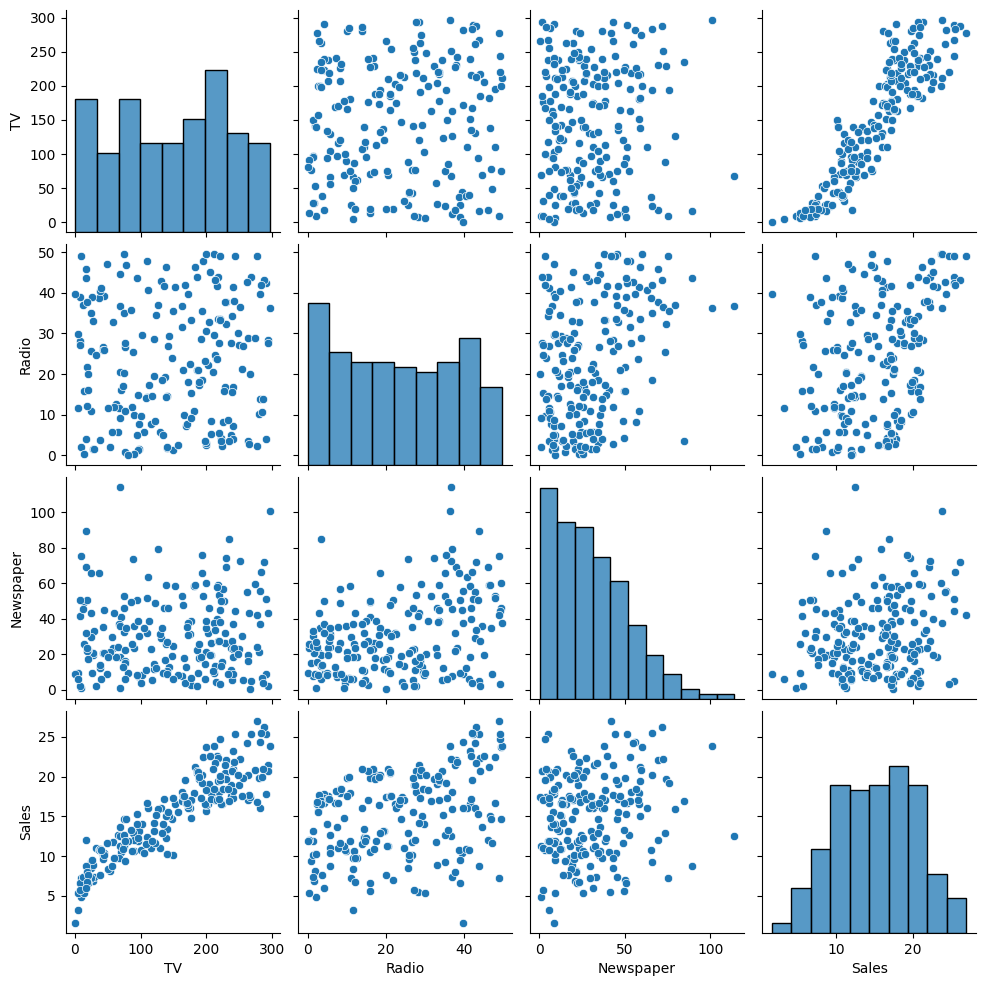

In [9]:
sns.pairplot(df)

In [10]:
#Step 3:Seperate cat and con features
cat = df.columns[df.dtypes==object]
con = df.columns[df.dtypes!=object]

In [11]:
cat

Index([], dtype='object')

In [12]:
con

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

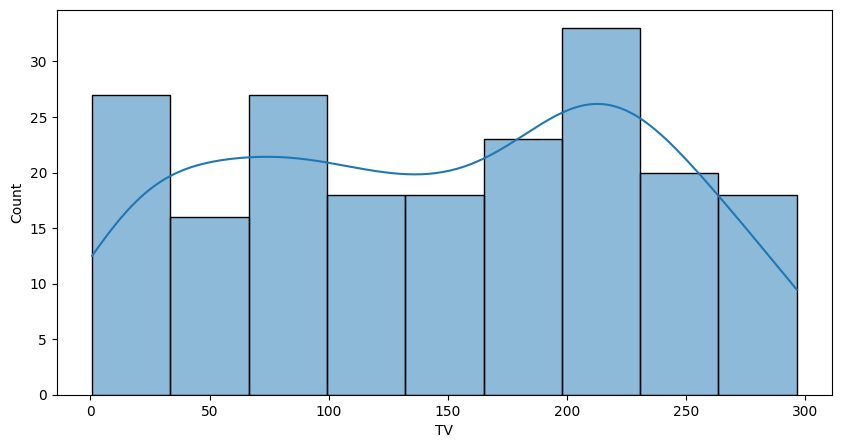

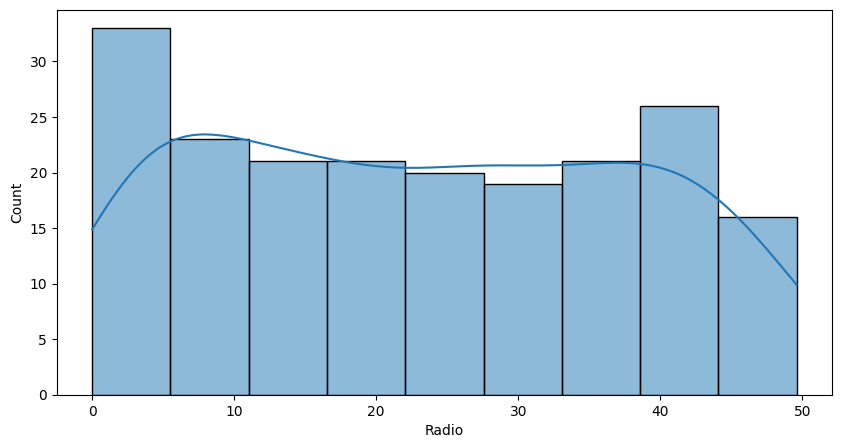

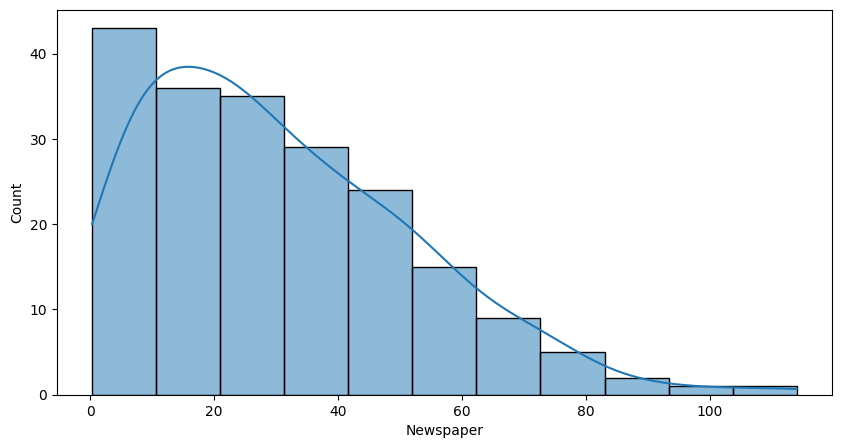

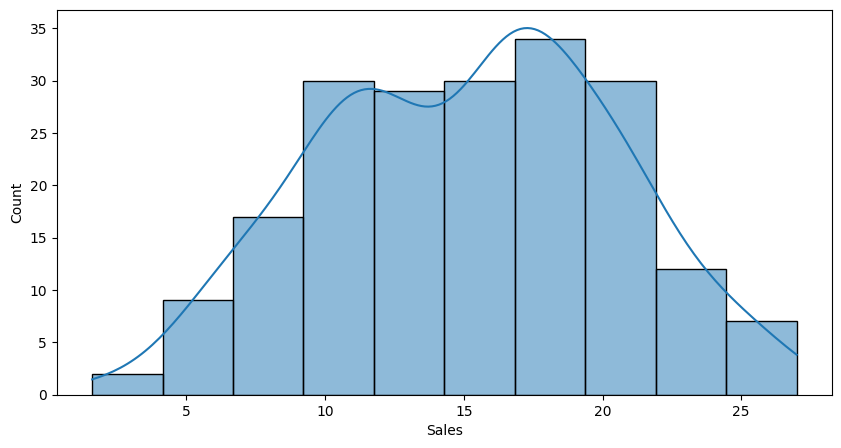

In [13]:
#Histogram
for i in con:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df,x=i,kde=True)
plt.show()

In [ ]:
#Step 4:Seperate  and y features
x = df.drop(columns=['Sales'])
y = df[['Sales']]

In [ ]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [ ]:
#Step 5:Preprocessing on x
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(x)
X_pre.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


In [ ]:
#Step 5: Apply Train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, y, test_size=0.33, random_state=21)

In [ ]:
xtrain.head()

,TV,Radio,Newspaper
7,-0.313437,-0.247406,-0.872487
95,0.189837,0.562876,1.028627
156,-0.620538,1.366407,0.918151
175,1.516330,1.731034,0.517674
140,-0.859914,-0.422968,-0.812646


In [ ]:
ytrain.head()

,Sales
7,13.2
95,16.9
156,15.3
175,27.0
140,10.9


In [ ]:
xtest.head()

,TV,Radio,Newspaper
144,-0.593682,-0.571519,0.384182
9,0.616043,-1.395307,-0.430582
17,1.568876,1.103065,1.162119
20,0.833233,0.299535,1.051643
45,0.327624,-0.051588,0.043546


In [ ]:
ytest.head()

,Sales
144,12.3
9,15.6
17,24.4
20,18.0
45,16.1


In [ ]:
#Step 6:Model building
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
#Get r2 score in train and test
model.score(xtrain, ytrain)

0.9032539746434711

In [ ]:
model.score(xtest, ytest)

0.8978733461071879

In [ ]:
#Get predictions for train and test
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [ ]:
ypred_train[0:5]

array([[13.45647332],
       [17.04362958],
       [14.61006864],
       [25.27353631],
       [10.59353494]])

In [ ]:
ytrain.head()


,Sales
7,13.2
95,16.9
156,15.3
175,27.0
140,10.9


In [ ]:
ypred_test[0:5]

array([[11.50195624],
       [15.84210114],
       [24.4112916 ],
       [19.61337089],
       [16.72466786]])

In [ ]:
ytest.head()

,Sales
144,12.3
9,15.6
17,24.4
20,18.0
45,16.1


In [ ]:
#Get the mean squared error , mean absolute error, rmse, r2
def evaluate_model(model, x, y):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    # Predict the results for x
    ypred = model.predict(x)
    # Get mse, rmse, mae, r2
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'R2 Score : {r2:.4f}')

In [ ]:
evaluate_model(model,xtrain,ytrain)

Mean Squared Error : 2.52
Root Mean Squared Error : 1.59
Mean Absolute Error : 1.22
R2 Score : 0.9033


In [ ]:
evaluate_model(model,xtest,ytest)

Mean Squared Error : 3.19
Root Mean Squared Error : 1.79
Mean Absolute Error : 1.27
R2 Score : 0.8979
